In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D

In [2]:
train = "Dataset/Train"
test = "Dataset/Test"
valid = "Dataset/Validation"

In [3]:
train_gen = ImageDataGenerator(
    rescale=1./255.0)
test_gen = ImageDataGenerator(
    rescale=1./255.0)
valid_gen = ImageDataGenerator(
    rescale=1./255.0)

In [4]:
train_ds = train_gen.flow_from_directory(
    train,target_size=(224,224),batch_size=128, class_mode='binary')
test_ds = test_gen.flow_from_directory(
    test,target_size=(224,224),batch_size=128, class_mode='binary')
valid_ds = valid_gen.flow_from_directory(
    valid,target_size=(224,224),batch_size=128, class_mode='binary')

Found 160000 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [5]:
def plot_data(ds,batch_num,image_num):
    plt.imshow(ds[batch_num][0][image_num])
    name = np.argmax(ds[batch_num][1][image_num])
    plt.xlabel(list(train_ds.class_indices)[name])

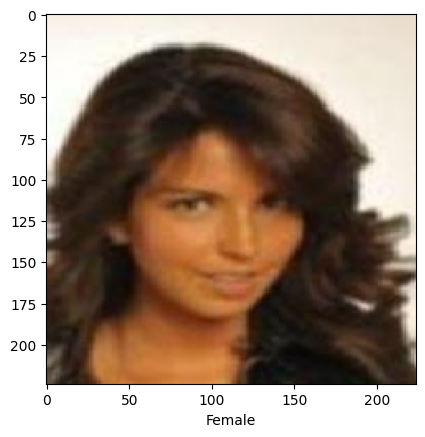

In [6]:
plot_data(train_ds,1,1)

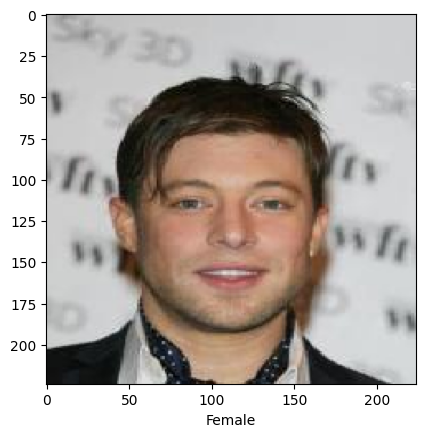

In [7]:
plot_data(test_ds,2,2)

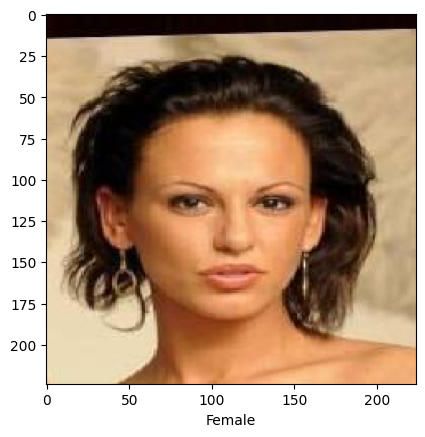

In [8]:
plot_data(valid_ds,2,30)

In [9]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=[224,224,3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 128)               50466944  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,467,969
Trainable params: 50,467,969
Non-trainable params: 0
____________________________________________

In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
1250/1250 [==============================] - 6601s 5s/step - loss: 0.3603 - accuracy: 0.9180 - val_loss: 0.1246 - val_accuracy: 0.9532
Epoch 2/10
1250/1250 [==============================] - 3170s 3s/step - loss: 0.1073 - accuracy: 0.9586 - val_loss: 0.1175 - val_accuracy: 0.9542
Epoch 3/10
1250/1250 [==============================] - 2934s 2s/step - loss: 0.0800 - accuracy: 0.9697 - val_loss: 0.1221 - val_accuracy: 0.9542
Epoch 4/10
1250/1250 [==============================] - 2937s 2s/step - loss: 0.0589 - accuracy: 0.9778 - val_loss: 0.1313 - val_accuracy: 0.9547
Epoch 5/10
1250/1250 [==============================] - 2888s 2s/step - loss: 0.0411 - accuracy: 0.9848 - val_loss: 0.1480 - val_accuracy: 0.9534
Epoch 6/10
 221/1250 [====>.........................] - ETA: 37:39 - loss: 0.0203 - accuracy: 0.9932